__Agenda__

- Discussion of the problem dimension reduction.

- Review components of PCA and its role in modeling
- Go through three demos - random data, small dataset, data image processing

- Implement PCA with sklearn. Understand the parameters and methods.

- Apply sklearn for noise cancelling.

# Dimensionality Reduction

- Approximate the original dataset with less variables. 

- Reduce the redundancy in the data.

- Use of computational resources more efficiently.

- Visualization

- Usually from 1000D to 100D

- Ex: Two columns that measures the length with different units (inches/cm)

- Ex: Instead of Skill vs Enjoyment use Aptitue.

[Andrew Ng on Dimension Reduction](https://www.youtube.com/watch?v=Zbr5hyJNGCs)

[Visualizing High Dimensional Data ](https://experiments.withgoogle.com/visualizing-high-dimensional-space)



## Principal Component Analysis

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.

__Idea Behind PCA__

[Projection in action](https://www.desmos.com/calculator/tpahiv1skb)

[An interactive Tool for PCA](http://setosa.io/ev/principal-component-analysis/)

__10 minute discussion time with your group__

Answer:

- What does PCA do?
- What is the objective in PCA?
- How would you explain first principal component to someone?


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Scaling Data

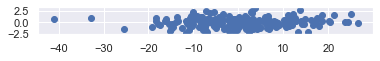

In [22]:
# %load -r  33-37 supplement.py
rng = np.random.RandomState(2)
X = rng.multivariate_normal(mean = [0,0], cov = [[100, 0.1], [0.1, 1]], size = 200)
plt.scatter(X[:, 0], X[:, 1] )
plt.axis('scaled')
plt.draw()

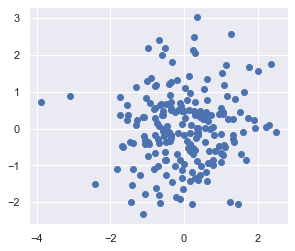

In [11]:
# %load -r  39-47 supplement.py
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)

plt.scatter(X[:,0], X[:,1])
plt.axis('scaled')
plt.show()

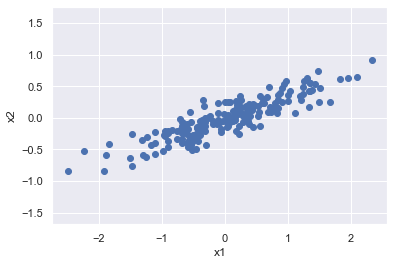

In [23]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

__Your Turn__ 5 Mins

- Scale the dataset with standard scaler and plot the scaled data.

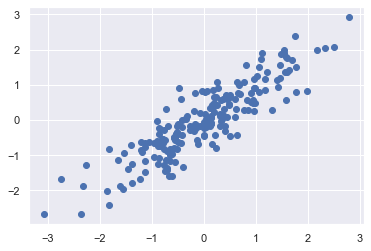

In [24]:
# %load -r 21-30 supplement.py
## After Standard Scaling
## Note that in general using PCA with StantardScaler is a good idea
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)

plt.scatter(X[:,0], X[:,1])
plt.show()

## Sklearn PCA

In [36]:
# %load -r 8-10 supplement.py
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

pca.fit(X)

pca.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

__Your Turn 5 mins__

- Change `n_components` parameter 

- Try to set `n_components = .95 or .75`. Would this work?

__Your turn 15 mins__

- [Read the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (Check `methods` and `attributes`)
- After you fit, what does `components_` give?

- What is `explained_variance_`? Do you get different results for different `n_components_` values?

- How about `explained_variance_ratio`? Now try to set `n_components = 0.99` and fit the model again. What do you think happen?
- Transform the dataset X and plot it.

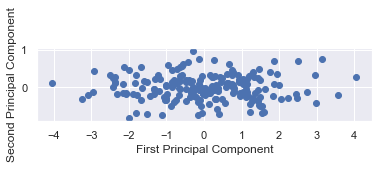

In [29]:
# %load -r 1-6 supplement.py
Xpca = pca.transform(X)

plt.scatter(Xpca[:,0], Xpca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.axis('scaled')
plt.show()

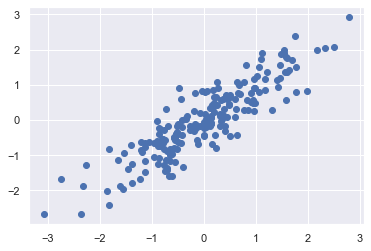

In [38]:
# %load -r 49-51 supplement.py
X_inv  = pca.inverse_transform(Xpca)

plt.scatter(X_inv[:,0], X_inv[:,1])

Let's see the principal directions on the original dataset.

(-3.3534087054527717,
 3.079070151762556,
 -2.9610077757452697,
 3.2159825436132246)

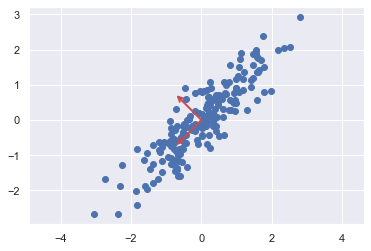

In [40]:
# %load -r 53-65 supplement.py
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color = 'r',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

__Your Turn 10 mins__

- Now choose n_components=1 and fit pca again to the original dataset.

- Transform the data as Xpca

- Call the inverse_transform method and plot both original data and inversed_transformed data

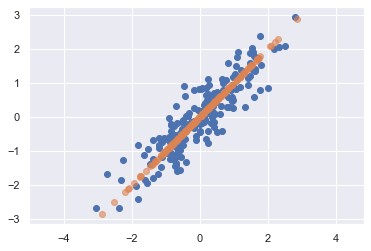

In [48]:
# %load -r 13-19 supplement.py
pca = PCA(n_components=1)
pca.fit(X)
Xpca = pca.transform(X)
X_new = pca.inverse_transform(Xpca)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.6)
plt.axis('equal');

[For more details on how to find principal directions](https://www.youtube.com/watch?v=_UVHneBUBW0)

[The linear algebra intuition behind this](https://www.youtube.com/watch?v=PFDu9oVAE-g)



### How to choose number of components

- "99% of the variance retained"

- Other common values "95% and 90%"




### Advise for applying PCA

- Speeding up supervised learning task

- Bad use of PCA: To prevent overfitting:Use regularization instead!

- Bad use of PCA: Implement PCA without trying raw data.

[More on use of PCA](https://www.youtube.com/watch?v=xI9-I-gcwaw&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=87)

[Eating in UK](http://people.duke.edu/~hpgavin/SystemID/References/Richardson-PCA-2009.pdf)

## PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data .

We start by loading the data:

In [71]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(n_components = 3)

pca.fit(digits.data)

transformed_data = pca.transform(digits.data)

digits.data.shape

(1797, 64)

The data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:


<img src = 'https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png' width = 350>

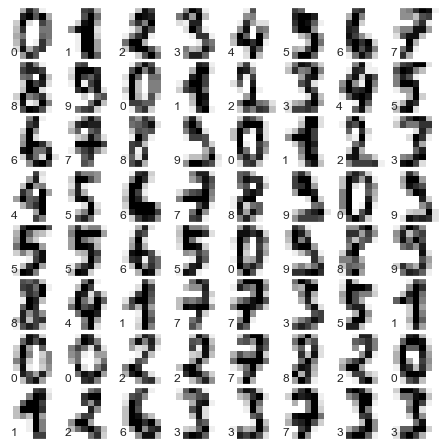

In [50]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [51]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components = 0.95)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 29)


In [53]:
pca.explained_variance_ratio_.sum()

0.28509364823698014

We can now plot the first two principal components of each point to learn about the data:

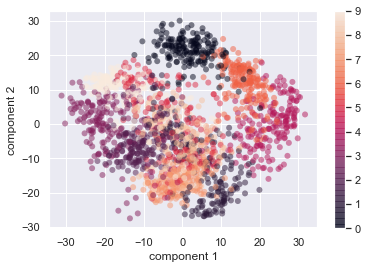

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

Also we can check the projected versions of the images:

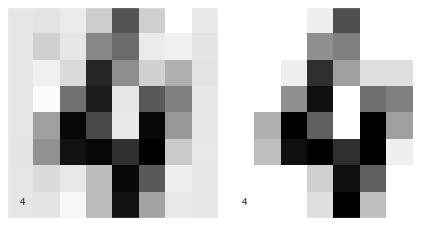

In [59]:
k= 4

data =pca.inverse_transform(projected[k,:])
data = data.reshape(8,8)

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])

ax.imshow(data, cmap=plt.cm.binary, interpolation='nearest')
ax.text(0, 7, str(digits.target[k]))
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])

ax.imshow(digits.images[k], cmap=plt.cm.binary, interpolation='nearest')
# label the image with the target value
ax.text(0, 7, str(digits.target[k]))
plt.draw()

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

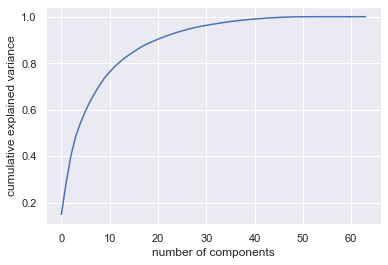

In [24]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

In [31]:
# def plot_digits(data):
#     fig, axes = plt.subplots(4, 10, figsize=(10, 4),
#                              subplot_kw={'xticks':[], 'yticks':[]},
#                              gridspec_kw=dict(hspace=0.1, wspace=0.1))
#     for i, ax in enumerate(axes.flat):
#         ax.imshow(data[i].reshape(8, 8),
#                   cmap='binary', interpolation='nearest',
#                   clim=(0, 16))
# plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

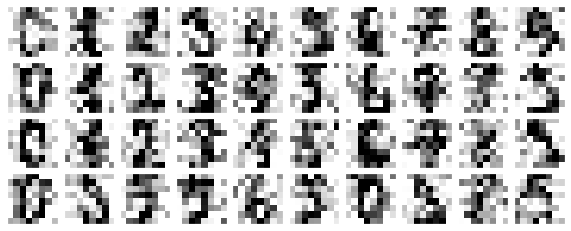

In [30]:
import numpy as np
np.random.seed(42)
noisy = np.random.normal(digits.data, 5)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [21]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

15

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

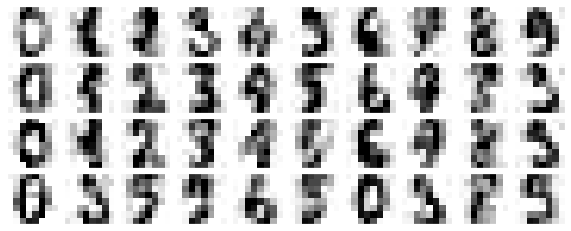

In [22]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Resources

[A detailed presentation on PCA](http://luthuli.cs.uiuc.edu/~daf/courses/CS-498-DAF-PS/Lecture%209%20-%20PCA.pdf)

[Interactive tool for PCA](http://setosa.io/ev/principal-component-analysis/)

[For noise cancellation example](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html)

[Kernel PCA vs PCA vs ICA](https://towardsdatascience.com/kernel-pca-vs-pca-vs-ica-in-tensorflow-sklearn-60e17eb15a64)

[Comparison of PCA and KPCA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)

[TSNE Demo](https://nicola17.github.io/tfjs-tsne-demo/)

[More Technical Explanation of PCA](http://people.duke.edu/~hpgavin/SystemID/References/Richardson-PCA-2009.pdf)